# Forecasting

Time series models are (largely) models of the temporal dependence observed in time series data

* the future depends of the past
* the past is informative about the future 

One motivation behind fitting models to a time series is to forecast future unobserved observations - which would not be possible without a model.

Prediction is interesting for a variety of reasons. First, it is one of the
few rationalizations for time-series to be a subject of its own, divorced from
economics.

## Time series process $\{z_t \}_{t=-\infty}^{\infty}$

$$\boldsymbol Z^{\infty} = \begin{bmatrix}\vdots \\ z_{-k} \\z_{-k+1}\\\vdots  \\z_{-1}\\z_0\\z_1\\\vdots\\z_T\\z_{T+1}\\\vdots\end{bmatrix} $$

Consider $z_{T+1}$

* at time $T$ it is a random variable with some (marginal) distribution

* and a conditional distribution, given  $\mathbf{z} = \{z_t \}_{t=1}^{T}$

$$ p(z_{T+1} |  \mathbf{z} ) $$

* describes all knowledge of $z_{T+1}$ given $\mathbf{z}$

* called __predictive distribution__

similarly for $z_{T+h}$

$$ p(z_{T+h} |  \mathbf{z} ) $$

### Point forecast

* What is our best guess $z^{f}_{T+h}$ of $z_{T+h}$ given information availalbe as of $T$?

* Depends on how we define "best", i.e. what the optimality criterion is

* if the goal is to minimize the __expected (mean) square error__

$$\operatorname{E} \left((z_{T+h} - z^{f}_{T+h})^2 | \mathbf{z}\right) $$
    

the best point forecast is

$$\operatorname{E}(z_{T+h} | \mathbf{z}) = \operatorname{E}_T (z_{T+h}) $$

* for other loss functions, the optimal forecast is another characteristics of the predictive distribution (e.g. the median)

*  $ p(z_{T+h} |  \mathbf{z} ) $ and $\operatorname{E}(z_{T+h} | \mathbf{z})$ are unknown
* we use models to approximate them

## Forecasting for AR(1) model

$$
z_{t} = \alpha z_{t-1} + \varepsilon_{t}
$$


* at time $T$ we observe $z_{1}, z_{2}, \cdots, z_{T}$ and want to forecast $z_{T+h}$

* $h = 1$

$$
z_{T+1} = \alpha z_{T} + \varepsilon_{T+1}
$$

$$\operatorname{E}(z_{T+1} | z_{1}, z_{2}, \cdots, z_{T} ) =  \operatorname{E}(z_{T+1} | z_{T} ) = \alpha z_{T}  $$

why?

the information in past $z$'s is the same as information in past $\varepsilon$'s, and $\varepsilon_{T+1}$ is __unpredictable__

* $h = 2 $

$$
\begin{align}
z_{T+2} &= \alpha z_{T+1} + \varepsilon_{T+2}\\
        &= \alpha^2 z_{T} + \alpha \varepsilon_{T+1} + \varepsilon_{T+2}\\
\end{align}
$$

$$\operatorname{E}(z_{T+2} | z_{1}, z_{2}, \cdots, z_{T} ) =  \operatorname{E}(z_{T+2} | z_{T} ) = \alpha^2 z_{T}  $$

* for any $h > 0$

$$\operatorname{E}(z_{T+h} | z_{1}, z_{2}, \cdots, z_{T} ) =  \operatorname{E}(z_{T+h} | z_{T} ) = \alpha^h z_{T}  $$

* as $h\longrightarrow \infty$

$$\operatorname{E}(z_{T+h} | z_{T} ) \longrightarrow 0 = \operatorname{E}(z_{t})  $$

first-order Markov process:
    
$$ p(z_{T+1} |  z_{1}, z_{2}, \cdots, z_{T} ) = p(z_{T+1} |  z_{T} )  $$

    
$z_{T+1}$ and $z_{1:T-1}$ are independent, conditional on $z_{T}$ 

higher-order Markov processes (AR(p)):
    
$z_{T+1}$ and $z_{1:T-p}$ are independent, conditional on $z_{T-p+1:T}$ 

### Mean squared error of the forecasts (MSE) 

* $h=1$

$$
\begin{align}
 \operatorname{E}  \left( (z_{T+1} - z^{f}_{T+1})^2 \right) &=  
\operatorname{Var}\left( z_{T+1} - \operatorname{E}(z_{T+1} | z_{T} ) \right)\\ &= \operatorname{Var}\left(z_{T+1} - \alpha z_{T} \right)\\ & = \operatorname{Var}\left(\varepsilon_{T+1} \right)\\ 
& = \sigma^2
\end{align}
$$

* $h>1$

$$
\begin{align}
 \operatorname{E}  \left( (z_{T+h} - z^{f}_{T+h})^2 \right) &= \operatorname{Var}\left(z_{T+h} - \alpha^h z_{T} \right)\\ & = \operatorname{Var}\left(\varepsilon_{T+h} + \alpha \varepsilon_{T+h-1} + \cdots, + \alpha^{h-1}\varepsilon_{T+1}\right)\\ 
& = \sigma^2 \left( 1 + \alpha^2 + \cdots + \alpha^{2(h-1)} \right)
\end{align}
$$

* as $h\longrightarrow \infty$

$$
\begin{align}
 \operatorname{E}  \left( (z_{T+h} - z^{f}_{T+h})^2 \right)  \longrightarrow  \frac{\sigma^2}{(1 - \alpha^2)} = \operatorname{Var}(z_{t})
\end{align}
$$

## Forecasting for AR(p) model

$$
z_{t} = \alpha_1 z_{t-1} + \alpha_2 z_{t-2} + \cdots + \alpha_p z_{t-p} + \varepsilon_{t}
$$

* $h = 1$

$$
z_{T+1} = \alpha_1 z_{T} + \alpha_2 z_{T-1} + \cdots + \alpha_p z_{T+1-p} + \varepsilon_{T+1}
$$

$$\operatorname{E}(z_{T+1} | z_{1}, z_{2}, \cdots, z_{T} ) =  \operatorname{E}(z_{T+1} | z_{T+1-p}, \cdots,z_{T-1}  ,z_{T} ) = \alpha_1 z_{T} + \alpha_2 z_{T-1} + \cdots + \alpha_p z_{T+1-p}  $$

for $h>1$, it is easier to use a VAR(1) representation:
    

$$
\underset{\mathbf{z}_t}{\underbrace{\left[\begin{array}{c}
z_{t}\\
z_{t-1}\\
\vdots\\
z_{t-p+1}
\end{array}\right]}}
=
\underset{\boldsymbol A}{\underbrace{\left[\begin{array}{cccccccc}
\alpha_1 & \alpha_2 & \cdots & \alpha_{p-1} & \alpha_p\\
1 &  0 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots \\
0  & 0  & \cdots & 1 & 0
\end{array}\right]}}
\underset{\mathbf{z}_{t-1}}{\underbrace{\left[\begin{array}{c}
z_{t-1}\\
z_{t-2}\\
\vdots\\
z_{t-p}
\end{array}\right]}}
+
\underset{\boldsymbol \varepsilon_{t}}{\underbrace{\left[\begin{array}{c}
\varepsilon_{t}\\
0\\
\vdots\\
0
\end{array}\right]}}
$$

$$
\begin{align}
\mathbf{z}_{T+1}  &= \boldsymbol A \mathbf{z}_{T} + \boldsymbol \varepsilon_{T+1}\\
\operatorname{E}(\mathbf{z}_{T+1} | \mathbf{z}_{T} )  &= \boldsymbol A \mathbf{z}_{T}
\end{align}
$$

$$
\operatorname{E}(\mathbf{z}_{T+h} | \mathbf{z}_{T} )  = \boldsymbol A^h \mathbf{z}_{T}
$$

$$
\mathbf{z}_{T+h}  - \operatorname{E}(\mathbf{z}_{T+h} | \mathbf{z}_{T} )  = \boldsymbol A^{h-1} \boldsymbol \varepsilon_{T+1} + \boldsymbol A^{h+2} \boldsymbol \varepsilon_{T+2}+ \cdots + \boldsymbol \varepsilon_{T+h}
$$

Let $\mathbf{e} = [1, 0, 0, \cdots, 0]'$ be a $p$ dimensional vector (first column of a $p \times p$ identity matrix). Then 

$$z_{T+h} = \mathbf{e}' \mathbf{z}_{T+h}  $$

and 

$$
\operatorname{E}(z_{T+h} | \mathbf{z}_{T} )  = \mathbf{e}'  \boldsymbol A^h \mathbf{z}_{T}
$$

$$
\operatorname{E} \left[ \left( \mathbf{z}_{T+h}  - \operatorname{E}(\mathbf{z}_{T+h} | \mathbf{z}_{T} ) \right)^2 \right] = (\boldsymbol A^{h-1} \boldsymbol \varepsilon_{T+1} + \boldsymbol A^{h+2} \boldsymbol \varepsilon_{T-2}+ \cdots + \boldsymbol \varepsilon_{T+h})^2
$$

* the MSE of the forecast:

$$
\mathbf{e}' \operatorname{E} \left[ \left( \mathbf{z}_{T+h}  - \operatorname{E}(\mathbf{z}_{T+h} | \mathbf{z}_{T} ) \right)^2 \right] \mathbf{e} = \sigma^2 \left( a_{h-1}^2 + a_{h-2}^2 + \cdots + 1 \right)
$$

where $a_i = \mathbf{e}' \boldsymbol A^{i}  \mathbf{e} $

## Forecasting for MA(q) and ARMA(p,q) models

### MA(q)

$$ z_t = \varepsilon_{t} + \beta_1 \varepsilon_{t-1} + \cdots + \beta_q \varepsilon_{t-q} $$

$$ z_{T+1} = \varepsilon_{T+1} + \beta_1 \varepsilon_{T} + \cdots + \beta_q \varepsilon_{T-q+1} $$

$$ 
\begin{align}
\operatorname{E}_{T} z_{T+1} &= \operatorname{E}_{T} \varepsilon_{T+1} + \beta_1 \operatorname{E}_{T} \varepsilon_{T} + \cdots + \beta_q \operatorname{E}_{T} \varepsilon_{T-q+1} \\
&= \beta_1 \operatorname{E}_{T} \varepsilon_{T} + \cdots + \beta_q \operatorname{E}_{T} \varepsilon_{T-q+1} 
\end{align}
$$

$$ 
\begin{align}
\operatorname{E}_{T} z_{T+2} &= \beta_2 \operatorname{E}_{T} \varepsilon_{T} + \cdots + \beta_q \operatorname{E}_{T} \varepsilon_{T-q+2} \;\;\; (h=2)
\end{align}
$$

$$ 
\begin{align}
\operatorname{E}_{T} z_{T+q} &=  \beta_q \operatorname{E}_{T} \varepsilon_{T} \;\;\;\; (h=q)
\end{align}
$$

* if $h>q$

$$ 
\begin{align}
\operatorname{E}_{T} z_{T+h} =  0
\end{align}
$$

by __invertability__ of MA(q):

$$ 
\begin{align}
z_t &= \boldsymbol \beta(L) \varepsilon_t\\
\varepsilon_t  &= \frac{1}{\boldsymbol \beta(L)} = \boldsymbol \alpha(L)z_t \\ 
\end{align}
$$


$$ 
\begin{align}
\operatorname{E}_T \varepsilon_T &=  \operatorname{E}_T \boldsymbol \alpha(L) z_T \\ 
&=  \operatorname{E}_T (z_T + \alpha_1 z_{T-1} + \alpha_2 z_{T-2} + \cdots )\\ 
&= z_T + \alpha_1 z_{T-1} + \alpha_2 z_{T-2} + \cdots + \alpha_{T-1} z_{1}
\end{align}
$$

In [1]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

import numpy as np
from numpy.random import default_rng
from statsmodels.tsa.arima_process import arma_acovf, ArmaProcess

import statsmodels.tsa.api as smt

np.set_printoptions(precision=3, suppress=True)

__getting $\alpha_i$ in Python__

In [4]:
beta = np.array([.6, -.3]) # coefficients on e(t-1) and e(t-2)
ar = [1]  # coefficient on z_t
ma = np.r_[1, beta]
ma2_process = ArmaProcess(ar, ma)

ma2_process.arma2ar(100)
#statsmodels.tsa.arima_process.arma_impulse_response(ma=[1.0,], ar=[1, .6, -.3], leads=10)

array([ 1.   , -0.6  ,  0.66 , -0.576,  0.544, -0.499,  0.462, -0.427,
        0.395, -0.365,  0.338, -0.312,  0.289, -0.267,  0.247, -0.228,
        0.211, -0.195,  0.18 , -0.167,  0.154, -0.142,  0.132, -0.122,
        0.112, -0.104,  0.096, -0.089,  0.082, -0.076,  0.07 , -0.065,
        0.06 , -0.055,  0.051, -0.047,  0.044, -0.041,  0.037, -0.035,
        0.032, -0.03 ,  0.027, -0.025,  0.023, -0.022,  0.02 , -0.018,
        0.017, -0.016,  0.015, -0.014,  0.012, -0.012,  0.011, -0.01 ,
        0.009, -0.008,  0.008, -0.007,  0.007, -0.006,  0.006, -0.005,
        0.005, -0.005,  0.004, -0.004,  0.004, -0.003,  0.003, -0.003,
        0.003, -0.002,  0.002, -0.002,  0.002, -0.002,  0.002, -0.001,
        0.001, -0.001,  0.001, -0.001,  0.001, -0.001,  0.001, -0.001,
        0.001, -0.001,  0.001, -0.001,  0.001, -0.   ,  0.   , -0.   ,
        0.   , -0.   ,  0.   , -0.   ])

* the MSE of forecast:
* h = 2

$$ 
\begin{align}
z_{T+2} &= \varepsilon_{T+2} + \beta_1  \varepsilon_{T+1} + \beta_2  \varepsilon_{T} + \cdots + \beta_q \operatorname{E}_{T} \varepsilon_{T-q+2} \\
\operatorname{E}_{T} z_{T+2} &= \beta_2 \operatorname{E}_{T} \varepsilon_{T} + \cdots + \beta_q \operatorname{E}_{T} \varepsilon_{T-q+2} 
\end{align}
$$

If $\operatorname{E}_{T} \varepsilon_{T} \approx  \varepsilon_{T}$, $\operatorname{E}_{T} \varepsilon_{T-1} \approx  \varepsilon_{T-1}$, etc:

$$
\operatorname{E} \left[ \left( z_{T+2}  - \operatorname{E}(z_{T+2} | \mathbf{z}_{T} ) \right)^2 \right] \mathbf{e} = \sigma^2 \left( 1 + \beta_{1}^2\right)
$$

* general $h$

$$
\operatorname{E} \left[ \left( z_{T+h}  - \operatorname{E}(z_{T+h} | \mathbf{z}_{T} ) \right)^2 \right] \mathbf{e} = \sigma^2 \left( 1 + \beta_{1}^2 + \beta_{2}^2 + \cdots + \beta_{h-1}^2 \right)
$$

## ARMA(p, q)

$$
\begin{align}
z_t &= \alpha_1 z_{t-1}  + \cdots + \alpha_p z_{t-p} + \varepsilon_{t} + \beta_1 \varepsilon_{t-1} + \cdots + \beta_q \varepsilon_{t-q}
\end{align}
$$



$$
z_{T+1} = \alpha_1 z_{T} + \cdots + \alpha_p z_{T-p+1} + \varepsilon_{T+1} + \beta_1 \varepsilon_{T} + \cdots + \beta_q \varepsilon_{T-q+1}
$$

$$ 
\begin{align}
\operatorname{E}_{T} z_{T+1} &= \alpha_1 z_{T}  + \cdots + \alpha_p z_{T-p+1}  + \beta_1 \operatorname{E}_{T} \varepsilon_{T} + \cdots + \beta_q \operatorname{E}_{T} \varepsilon_{T-q+1} 
\end{align}
$$

$$
\operatorname{E}_{T} z_{T+2} = \alpha_1 \operatorname{E}_{T} z_{T+1} + \alpha_2 z_{T} + \cdots + \alpha_p z_{T-p+2} + \beta_2 \operatorname{E}_{T} \varepsilon_{T} + \cdots + \beta_q \operatorname{E}_{T} \varepsilon_{T-q+2}
$$

* obtain $\operatorname{E}_{T} \varepsilon_{T}$, $\operatorname{E}_{T} \varepsilon_{T-1}$ etc as in the MA(q) case

$$ 
\begin{align}
\boldsymbol \alpha(L) z_t &= \boldsymbol \beta(L) \varepsilon_t\\
\varepsilon_t  &= \frac{\boldsymbol \alpha(L)}{\boldsymbol \beta(L)}z_t = \boldsymbol \psi(L)z_t \\ 
\end{align}
$$

In [5]:
alpha = np.array([.8])
beta = np.array([0.1])
ar = np.r_[1, -alpha] # coefficient on z(t) and z(t-1)
ma = np.r_[1, beta]  # coefficients on e(t) and e(t-1)
arma11_process = ArmaProcess(ar, ma)

arma11_process.arma2ar(8)

array([ 1.   , -0.9  ,  0.09 , -0.009,  0.001, -0.   ,  0.   , -0.   ])

Using the $MA(\infty)$ representation:

$$ 
\begin{align}
\boldsymbol \alpha(L) z_t &= \boldsymbol \beta(L) \varepsilon_t\\
z_t  &= \frac{\boldsymbol \beta(L)}{\boldsymbol \alpha(L)} \varepsilon_t = \boldsymbol \phi(L) \varepsilon_t
\end{align}
$$

we have 
$$ 
\begin{align}
z_{T+h}  = \varepsilon_{T+h} + \phi_1 \varepsilon_{T+h-1} + \phi_2 \varepsilon_{T+h-2} + \cdots + \phi_h \varepsilon_{T} + \phi_{h+1} \varepsilon_{T-1} + \phi_{h+2} \varepsilon_{T-2} + \cdots 
\end{align}
$$

and 

$$ 
\begin{align}
\operatorname{E}_T z_{T+h}  = \phi_h \operatorname{E}_T  \varepsilon_{T} + \phi_{h+1} \operatorname{E}_T \varepsilon_{T-1} + \phi_{h+2} \operatorname{E}_T \varepsilon_{T-2} + \cdots 
\end{align}
$$

* the MSE of forecast : 

$$
\operatorname{E} \left[ \left( z_{T+h}  - \operatorname{E}(z_{T+h} | \mathbf{z}_{T} ) \right)^2 \right] = \sigma^2 \left( 1 + \phi_{1}^2 + \phi_{2}^2 + \cdots + \phi_{h-1}^2 \right)
$$


assuming (as for MA(q)) $\operatorname{E}_{T} \varepsilon_{T} \approx  \varepsilon_{T}$, $\operatorname{E}_{T} \varepsilon_{T-1} \approx  \varepsilon_{T-1}$, etc:

* in general $\operatorname{E}(z_{T+h} | \mathbf{z}) $ is unknown and non-linear function of $\mathbf{z}$

## Gaussian time series model

$$
p(\underbrace{z_1, z_2, \cdots, z_T}_{\mathbf{z}_1}, \underbrace{z_{T+1},\cdots, z_{T+h}}_{\mathbf{z}_2}) = p(\mathbf{z}_1, \mathbf{z}_2) \sim \mathcal{N}(\boldsymbol \mu, \mathbf{\Sigma}).
$$

Then, 

$$
p(\mathbf{z}_2 | \mathbf{z}_1) = \mathcal{N}(\boldsymbol \mu_2 + \mathbf{\Sigma}_{2 1} \mathbf{\Sigma}^{-1}_{1 1} (\mathbf{z}_1 - \boldsymbol \mu_1), \mathbf{\Sigma}_{2 2} - \mathbf{\Sigma}_{2 1}\mathbf{\Sigma}_{1 1}^{-1}\mathbf{\Sigma}_{1 2}) 
$$

* $\operatorname{E}(\mathbf{z}_2 | \mathbf{z}_1) = \boldsymbol \mu_2 + \mathbf{\Sigma}_{2 1} \mathbf{\Sigma}^{-1}_{1 1} (\mathbf{z}_1 - \boldsymbol \mu_1)\;\;\;\;\;$              __optimal forecast__
* $\operatorname{cov}(\mathbf{z}_2 | \mathbf{z}_1) = \mathbf{\Sigma}_{2 2} - \mathbf{\Sigma}_{2 1}\mathbf{\Sigma}_{1 1}^{-1}\mathbf{\Sigma}_{1 2}\;\;\;\;\;\;\;\;\;$ __MSE of the optimal forecast__

* we can restrict "best" to apply to linear functions only: __best linear predictor__ of $z_{T+h}$ given $\mathbf{z}$

$$
z^{f}_{T+h} = \beta_0 + \mathbf{\beta}'_1 \mathbf{z} \tag{1}
$$

* if the loss is the MSE, the  __best linear predictor__ is (1) with 

$$
\begin{align}
\beta_0 &= \operatorname{E} z_{T+h} - \operatorname{Cov} (z_{T+h},\mathbf{z})  \operatorname{Cov} (\mathbf{z},\mathbf{z})^{-1} \operatorname{E} \mathbf{z}\\ 
\mathbf{\beta}_1 &= \operatorname{Cov} (z_{T+h},\mathbf{z})  \operatorname{Cov} (\mathbf{z},\mathbf{z})^{-1} 
\end{align}
$$

## Prediction operator

the __best linear prediction__ of random variable $y$ given a random vector $\mathbf{z}$

$$
\begin{align}
\operatorname{P}(y|\mathbf{z}) &= \mu_{y} + \phi' \left(\mathbf{z} - \mu_{\mathbf{z}}\right)\\
\text{}\\
\text{with}\\
\text{}\\
\phi' &=  \operatorname{cov}(y,\mathbf{z})' \operatorname{cov}(\mathbf{z},\mathbf{z})^{-1} 
\end{align}
$$

* has lowest MSE loss

the __MSE__ of $\operatorname{P}(y|\mathbf{z})$:

$$
\operatorname{E}\left[\left(y - \operatorname{P}(y|\mathbf{z}) \right)^2\right] = \operatorname{var}(y) -  \operatorname{cov}(y,\mathbf{z})' \operatorname{cov}(\mathbf{z},\mathbf{z})^{-1} \operatorname{cov}(y,\mathbf{z})
$$

__properties of $\operatorname{P}(y|\mathbf{z})$ :__

* $\operatorname{E} \left(y - \operatorname{P}(y|\mathbf{z}) \right) = 0$
* $\operatorname{E} \left((y - \operatorname{P}(y|\mathbf{z}))\mathbf{z} \right) = 0$
* $\operatorname{P}\left(z_i|\mathbf{z}) \right) = z_i$
* $\operatorname{P}\left(y|\mathbf{z}) \right) = \operatorname{E} y$, if $\operatorname{cov}(y,\mathbf{z})=0$

### ARMA forecasting in Python

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from numpy.random import default_rng

* generate data from ARMA(1,1)

In [7]:
gen = default_rng(100)
T=700
z = arma11_process.generate_sample(T, distrvs=gen.normal)

* estimate

In [8]:
arma_model = ARIMA(z, order=(1, 0, 1), trend="n")
arma_results = arma_model.fit()
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  700
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -998.176
Date:                Mon, 21 Mar 2022   AIC                           2002.351
Time:                        10:22:36   BIC                           2016.005
Sample:                             0   HQIC                          2007.629
                                - 700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8075      0.027     29.733      0.000       0.754       0.861
ma.L1          0.0199      0.047      0.423      0.672      -0.072       0.112
sigma2         1.0126      0.058     17.456      0.0

* forecast the next 5 values

In [9]:
arma_results.forecast(steps=5)

array([-0.816, -0.659, -0.532, -0.43 , -0.347])

* get forecasts and CI

In [10]:
fcast_res = arma_results.get_forecast(steps=5,)
fcast_res.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,-0.815737,1.006267,-2.787985,1.156510
1,-0.658719,1.306041,-3.218512,1.901073
2,-0.531925,1.468926,-3.410966,2.347116
3,-0.429537,1.566040,-3.498920,2.639846
4,-0.346857,1.626246,-3.534241,2.840527


* working with dates

In [11]:
data = pd.DataFrame(z, index=pd.date_range(start='1964', freq='M', periods=T), columns=['z'])
data.tail() 

,z
2021-12-31,-1.983945
2022-01-31,-3.883839
2022-02-28,-2.971514
2022-03-31,-2.339958
2022-04-30,-1.031274


In [13]:
arma_model = ARIMA(data, order=(1, 0, 1), trend="n")
arma_results = arma_model.fit()

In [14]:
fcast_res = arma_results.get_forecast(steps=24)
fcast = fcast_res.summary_frame()
fcast.head()

z,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-05-31,-0.815737,1.006267,-2.787985,1.156510
2022-06-30,-0.658719,1.306041,-3.218512,1.901073
2022-07-31,-0.531925,1.468926,-3.410966,2.347116
2022-08-31,-0.429537,1.566040,-3.498920,2.639846
2022-09-30,-0.346857,1.626246,-3.534241,2.840527


* plot forecasts

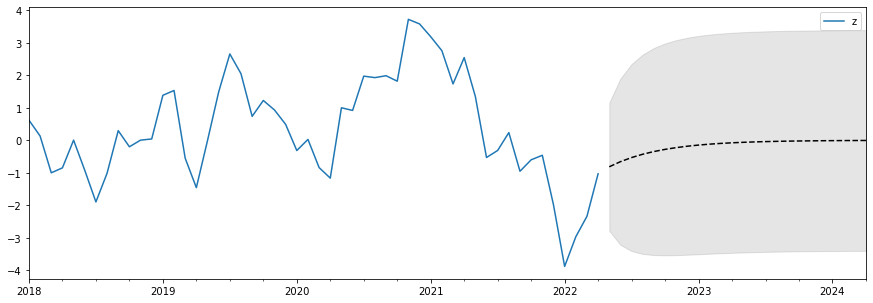

In [15]:

fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
data.loc['2018':].plot(ax=ax)
# Construct the forecasts
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);
 

## In-sample forecast evaluation

use 

$$ \frac{1}{T} \sum_{t=0}^{T-1} \left( z_{t+1} - \hat{z}^{f}_{t+1} \right)^2 $$

as an estimate of the MSE

$$ \operatorname{E}  \left( (z_{t+1} - z^{f}_{t+1})^2 \right)$$

In [16]:
data['forecast'] = arma_results.forecasts.flatten()
data['forecast errors'] = arma_results.forecasts_error.flatten()

data.tail()

,z,forecast,forecast errors
2021-12-31,-1.983945,-0.373014,-1.610931
2022-01-31,-3.883839,-1.634070,-2.249770
2022-02-28,-2.971514,-3.180953,0.209439
2022-03-31,-2.339958,-2.395378,0.055420
2022-04-30,-1.031274,-1.888448,0.857174


In [17]:
(arma_results.forecasts_error**2).sum()/T

1.0138467224702907

In [18]:
arma_results.mse

1.0138467224702907

In-sample forecasts are based on model estimated using the full sample

* in AR(1) model

$$\hat{z}^{f}_{t+1} = \hat{\alpha} z_{t}$$

introduces information from the future relative to the time ($t<T$) when forecasts are produced

## Out-of-sample (OOS) forecast evaluation

parameter estimates of the forecasting model use only information available at the time when the forecast is
computed

   + fit the model on a training sample $z_1, \cdots, z_t$ for some $t=t_0<T$

   + produce forecast $\hat{z}^{f}_{t+1}$ from the end of that sample
   

   + compare to true value $z_{t+1}$

   + expand the sample to include the next observation, and repeat until $t=T-1$

The OOS estimate of MSE

$$ \frac{1}{T-t_0} \sum_{t=t_0-1}^{T-1} \left( z_{t+1} - \hat{z}^{f}_{t+1} \right)^2 $$

In [ ]:
data = data[['z']]

In [39]:
# Setup forecasts
nforecasts = 1
forecasts = {}

# Get the number of initial training observations
nobs = len(data)
n_init_training = int(nobs * 0.8)

# Create model for initial training sample, fit parameters
init_training_endog = data.iloc[:n_init_training]
mod = ARIMA(init_training_endog, order=(1, 0, 1), trend="n")
res = mod.fit()

# Save initial forecast
forecasts[init_training_endog.index[-1]] = res.forecast(steps=nforecasts)

# Step through the rest of the sample
for t in range(n_init_training, nobs-1):
    # Update the results by appending the next observation
    updated_data = data.iloc[t:t+1]
    res = res.append(updated_data, refit=True)

    # Save the new set of forecasts
    forecasts[updated_data.index[0]] = res.forecast(steps=nforecasts)

# Combine all forecasts into a dataframe
forecasts = pd.concat(forecasts, axis=1)

In [40]:
forecasts.iloc[:5, :5]

,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31
2010-09-30,1.632432,NaN,NaN,NaN,NaN
2010-10-31,NaN,0.928112,NaN,NaN,NaN
2010-11-30,NaN,NaN,0.127096,NaN,NaN
2010-12-31,NaN,NaN,NaN,1.271923,NaN
2011-01-31,NaN,NaN,NaN,NaN,0.60945


In [41]:
forecasts.iloc[-5:, -5:]

,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
2021-12-31,-0.373446,NaN,NaN,NaN,NaN
2022-01-31,NaN,-1.62698,NaN,NaN,NaN
2022-02-28,NaN,NaN,-3.185304,NaN,NaN
2022-03-31,NaN,NaN,NaN,-2.400559,NaN
2022-04-30,NaN,NaN,NaN,NaN,-1.891933


In [42]:
# Construct the forecast errors
forecast_errors = {}
for c in forecasts.columns:
    forecast_errors[c] = data.iloc[n_init_training:, 0] - forecasts.loc[:,c]
    
forecast_errors = pd.DataFrame.from_dict(forecast_errors)    

In [43]:
def flatten(column):
    return column.dropna().reset_index(drop=True)

flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')
flattened.T.head()

horizon,1
2010-08-31,-0.496213
2010-09-30,-0.757934
2010-10-31,1.392945
2010-11-30,-0.523532
2010-12-31,-0.075812


In [44]:
forecast_errors = flattened.T.dropna().values.flatten()

In [45]:
# Compute the root mean square error
rmse = (forecast_errors**2).mean()**0.5

print(rmse)

1.0117784839655213
